# Looping Over Data Files

---

[Watch a walk-through of this lesson on YouTube]()



## Questions:
- How can I process many data sets with a single command?

## Learning Objectives:
- Be able to read and write globbing expressions that match sets of files.
- Use glob to create lists of files.
- Write for loops to perform operations on files given their names in a list.

---

## Use a `for` loop to process files given a list of their names.

*   A filename is a character string.
*   And lists can contain character strings.

~~~python
import pandas as pd
for filename in ['data/gapminder_gdp_africa.csv', 'data/gapminder_gdp_asia.csv']:
    data = pd.read_csv(filename, index_col='country')
    print(filename, data.min())
~~~

## Use [`glob.glob`](https://docs.python.org/3/library/glob.html#glob.glob) to find sets of files whose names match a pattern.

*   In Unix, the term globbing means matching a set of files with a pattern.
*   The most common patterns are:
    *   `*` meaning match zero or more characters
    *   `?` meaning match exactly one character
*   Python's standard library contains the [`glob`](https://docs.python.org/3/library/glob.html) module to provide pattern matching functionality
*   The [`glob`](https://docs.python.org/3/library/glob.html) module contains a function also called `glob` to match file patterns
*   E.g., `glob.glob('*.txt')` matches all files in the current directory 
    whose names end with `.txt`.
*   Result is a (possibly empty) list of character strings.

~~~python
import glob
print('all csv files in data directory:', glob.glob('data/*.csv'))
print('all PDB files:', glob.glob('*.pdb'))

~~~

## Use `glob` and `for` to process batches of files.

*   Helps a lot if the files are named and stored systematically and consistently
    so that simple patterns will find the right data.

~~~python
for filename in glob.glob('data/gapminder_*.csv'):
    data = pd.read_csv(filename)
    print(filename, data['gdpPercap_1952'].min())
~~~

*   This includes all data, as well as per-region data.
*   Use a more specific pattern in the exercises to exclude the whole data set.
*   But note that the minimum of the entire data set is also the minimum of one of the data sets,
    which is a nice check on correctness.

## Determining Matches

Which of these files is *not* matched by the expression `glob.glob('data/*as*.csv')`?

1. `data/gapminder_gdp_africa.csv`
2. `data/gapminder_gdp_americas.csv`
3. `data/gapminder_gdp_asia.csv`
4. 1 and 2 are not matched.

## Minimum File Size

Modify this program so that it prints the number of records in
the file that has the fewest records.

~~~python
import glob
import pandas as pd
fewest = ____
for filename in glob.glob('data/*.csv'):
    dataframe = pd.____(filename)
    fewest = min(____, dataframe.shape[0])
print('smallest file has', fewest, 'records')
~~~

Note that the [shape method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html)
returns a tuple with the number of rows and columns of the data frame.

In [2]:
### BEGIN SOLUTION

import glob
import pandas as pd
fewest = float('Inf')

for filename in glob.glob('data/*.csv'):
    dataframe = pd.read_csv(filename)
    fewest = min(fewest, dataframe.shape[0])
    
print('smallest file has', fewest, 'records')

### END SOLUTION

smallest file has 2 records


## Comparing Data

Write a program that reads in the regional data sets
and plots the average GDP per capita for each region over time
in a single chart.

The ideal solution builds a useful legend by using the string [`split`](https://docs.python.org/3/library/stdtypes.html#str.split) method to
extract the `region` from the path `data/gapminder_gdp_a_specific_region.csv`. The [`pathlib module`]
also provides useful abstractions for file and path manipulation like returning the name of a file 
without the file extension.

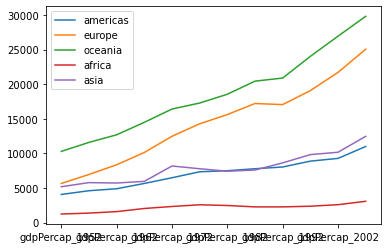

In [3]:
### BEGIN SOLUTION

import glob
import pandas as pd
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)
for filename in glob.glob('data/gapminder_gdp*.csv'):
    dataframe = pd.read_csv(filename)
    # extract <region from the filename, expected to be in the format 'data/gapminder_gdp_<region.csv'.
    # we will split the string using the split method and `_` as our separator,
    # retrieve the last string in the list that split returns (`<region.csv`), 
    # and then remove the `.csv` extension from that string.
    region = filename.split('_')[-1][:-4] 
    dataframe.mean().plot(ax=ax, label=region)
plt.legend()
plt.show()

### END SOLUTION

---
## Summary of Key Points:
- Use a `for` loop to process files given a list of their names.
- Use `glob.glob` to find sets of files whose names match a pattern.
- Use `glob` and `for` to process batches of files.

---
This lesson is adapted from the [Software Carpentry](https://software-carpentry.org/lessons/) [Plotting and Programming in Python](http://swcarpentry.github.io/python-novice-gapminder/) workshop. 

Licensed under [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/) 2021 by [SURGE](https://github.com/surge-dalhousie)